In [209]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv("diabetes.csv")

In [211]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Exploratory Data Analysis</h2>

In [212]:
df.shape

(768, 9)

In [213]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    

In [214]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [215]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [216]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

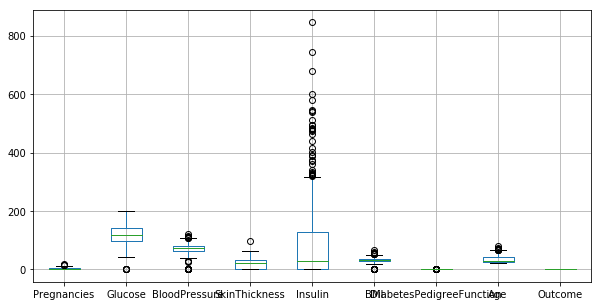

In [217]:
df.boxplot(figsize=(10,5))
plt.show()

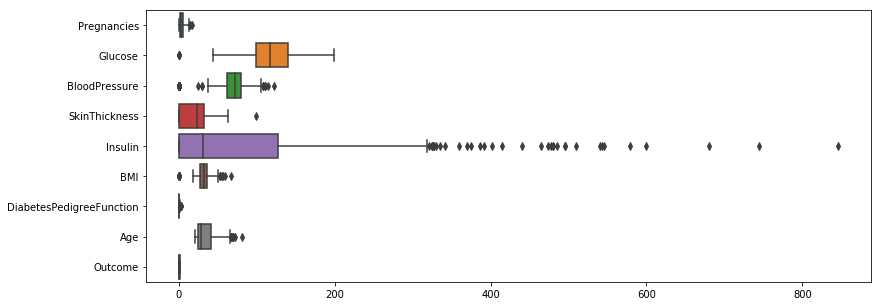

In [218]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

<h2>Replacing 0 with MEAN in respective columns</h2>

In [219]:
#except from pregnancies and outcome no other value can have a minimum of zero. So we replce it by their medians
df['Glucose']=df.Glucose.mask(df.Glucose == 0,df['Glucose'].median())
df['BloodPressure']=df.BloodPressure.mask(df.BloodPressure == 0,df['BloodPressure'].median())
df['SkinThickness']=df.SkinThickness.mask(df.SkinThickness == 0,df['SkinThickness'].median())
df['Insulin']=df.Insulin.mask(df.Insulin == 0,df['Insulin'].median())
df['BMI']=df.BMI.mask(df.BMI == 0,df['BMI'].median())
pd.set_option("max_rows", None)

In [220]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [221]:
X=df.drop('Outcome',axis=1)

In [222]:
y=df['Outcome']

In [223]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


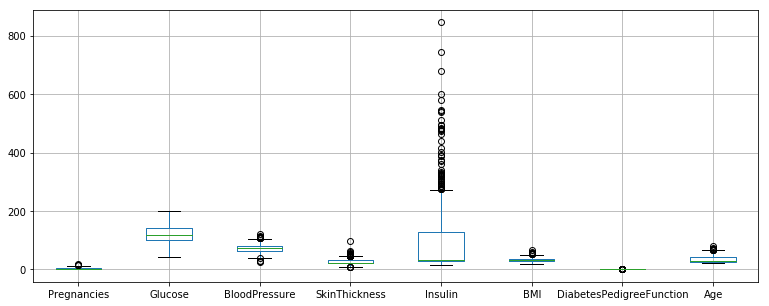

In [224]:
X.boxplot(figsize=(13,5))
plt.show()

<h2>Splitting of data for training and testing</h2>

In [225]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [226]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

In [349]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
429,1,95,82,25,180.0,35.0,0.233,43
114,7,160,54,32,175.0,30.5,0.588,39
755,1,128,88,39,110.0,36.5,1.057,37
214,9,112,82,32,175.0,34.2,0.260,36
322,0,124,70,20,30.5,27.4,0.254,36
89,1,107,68,19,30.5,26.5,0.165,24
222,7,119,72,23,30.5,25.2,0.209,37
740,11,120,80,37,150.0,42.3,0.785,48
442,4,117,64,27,120.0,33.2,0.230,24
417,4,144,82,32,30.5,38.5,0.554,37


In [350]:
y_train

429    1
114    1
755    1
214    1
322    1
89     0
222    0
740    1
442    0
417    1
268    0
252    0
648    1
490    0
483    0
616    0
294    0
14     1
139    0
332    1
31     1
132    1
140    0
735    0
586    1
645    0
175    1
87     0
377    0
434    0
619    1
411    0
527    0
165    1
456    0
144    0
368    0
73     0
339    1
548    0
348    0
251    0
127    0
232    0
32     0
34     0
657    0
193    1
187    1
308    1
579    1
687    0
270    1
762    0
730    1
84     1
628    0
239    0
530    0
100    1
461    0
126    0
62     0
507    0
250    0
86     0
667    1
105    0
161    0
517    0
244    0
224    0
263    0
709    1
359    1
376    0
108    0
290    0
312    1
95     0
384    0
426    0
568    0
253    0
488    0
311    0
166    0
681    1
694    0
390    0
287    1
141    0
421    0
714    0
363    1
634    0
183    0
245    1
16     1
646    1
7      0
409    1
68     0
427    1
522    0
405    0
620    0
362    0
123    0
653    0
309    1
2

<h2>Standard Scaler</h2>

In [351]:
from sklearn.preprocessing import StandardScaler


In [352]:
std=StandardScaler()

In [353]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [354]:
X_train_std

array([[-0.86593028, -0.90215944,  0.79088849, ...,  0.36412025,
        -0.70214526,  0.77411276],
       [ 0.90382433,  1.27068389, -1.59866744, ..., -0.29011494,
         0.34798356,  0.43923559],
       [-0.86593028,  0.2009764 ,  1.30293618, ...,  0.58219865,
         1.73533686,  0.27179701],
       ...,
       [-0.57097118, -0.73501765, -0.23320691, ...,  1.16374104,
         0.6112553 , -0.7328345 ],
       [ 0.01894703,  0.50183163,  0.96157105, ..., -0.18834502,
        -0.64594118, -0.31423804],
       [-1.16088939,  0.03383461,  1.30293618, ...,  0.39319737,
        -0.8086372 , -0.39795733]])

<h2>Train our Model<br><br>
Logistic Regression</h2>

In [355]:
from sklearn.linear_model import LogisticRegression

In [356]:
lr=LogisticRegression()

In [357]:
lr.fit(X_train_std,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [358]:
predict=lr.predict(X_test_std)

In [359]:
from sklearn.metrics import accuracy_score

In [360]:
accuracy_score(y_test,predict)*100

81.25

In [361]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [362]:
y_test

202    0
656    0
304    0
176    0
510    1
599    0
511    0
196    0
164    1
538    0
292    1
484    1
92     0
181    0
254    1
179    1
705    0
590    1
171    1
729    0
739    1
718    0
278    0
326    1
23     1
408    1
156    0
440    1
18     0
438    0
607    0
394    1
595    1
494    0
569    1
46     0
551    0
125    1
668    0
733    0
238    1
316    0
758    0
606    1
633    0
296    1
567    0
495    0
211    0
671    0
113    0
604    1
354    0
38     1
189    1
240    0
446    0
320    0
629    0
147    0
30     0
122    0
654    0
500    0
115    1
566    0
531    0
6      1
305    0
561    1
759    1
472    0
267    0
553    0
370    1
291    1
150    0
172    0
249    0
571    0
47     0
596    0
750    1
203    0
462    0
741    0
588    1
431    0
262    0
343    0
256    0
5      0
387    1
158    0
717    0
662    1
277    0
528    0
737    0
475    0
412    0
688    0
609    0
365    0
65     0
219    1
640    0
534    0
647    1
237    1
230    1
1

<h2>Decision Tree</h2>

In [367]:
from sklearn.tree import DecisionTreeClassifier

In [368]:
dt=DecisionTreeClassifier()

In [370]:
dt.fit(X_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [371]:
predictt=dt.predict(X_test_std)

In [372]:
from sklearn.metrics import accuracy_score

In [375]:
accuracy_score(y_test,predictt)*100

74.47916666666666

<h2>Random Forest Tree</h2>

In [377]:
from sklearn.ensemble import RandomForestClassifier

In [378]:
rft=RandomForestClassifier()

In [379]:
rft.fit(X_train_std,y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [380]:
predicttt=rft.predict(X_test_std)

In [381]:
from sklearn.metrics import accuracy_score

In [382]:
accuracy_score(y_test,predicttt)

0.734375

<h2>KNN - K Nearest Neighbours</h2>

In [390]:
from sklearn.neighbors import KNeighborsClassifier

In [391]:
knn=KNeighborsClassifier()

In [392]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [393]:
predictttt=knn.predict(X_test_std)

In [394]:
from sklearn.metrics import accuracy_score

In [395]:
accuracy_score(y_test,predictttt)*100

78.64583333333334

<h2>Deep learning</h2>

In [452]:
from sklearn.neural_network import MLPClassifier

In [506]:
mlp=MLPClassifier(hidden_layer_sizes=(9))

In [507]:
mlp.fit(X_train_std,y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=9, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [508]:
predicttttt=mlp.predict(X_test_std)

In [509]:
accuracy_score(y_test,predicttttt)*100

84.89583333333334